# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [25]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [26]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

**Now** that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [27]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [28]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [29]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)


In [30]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here

# When we train the data with a specific artist, and then we use songs from the same artist - we won't have a true understanding of whether this model classifies well or not.
# Our test set should validate the model, and show it's accuracy - and using the same arsist will not show that.
# Specificly, we don't want to overfit the data accurding to this artist.

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [31]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

[link text](https://)Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [ ]:
# Write your explanation here

# In theory, both training and test sets should be large enough so that the probability of the entire set 
# will converge to a normal probability due to the law of large numbers.
# In practice, the validation set is much larger than the test set, 
# so we assume the probability factors of the training set are much closer to ideal.

# Hence, if we assume the training and test sets should converge to the same normal variable, 
# we should use the means and standard deviation calculating using the training set to normalize the test set.

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [32]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here

# We should use validation data to evaluate the performences of our model, and to adjust it if needed.
# Without validation, the model that was built using only the training set is much more prone to overfitting.
# To avoid that situation we devide the overall set of samples to three seperate data sets (training, validaion, and test).
# We test our NN (with the test set) only after finishing the training and validation steps (with the respective data sets).
# If we use the test set too many times, it will be learned by the model, without being validated,
# causing the overal model to be overfitted to the test set data.


## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [33]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  e = 10e-20  # stabling factor - so we won't have log(0)
  return -t * np.log(y + e) - (1 - t) * np.log(1 - y + e)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [34]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here 
  X_T = X.transpose();
  z = np.dot(w, X_T) + b;
  return sigmoid(z);

pred(np.zeros(90), 1, np.ones([2, 90]))

array([0.73105858, 0.73105858])

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [11]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  x = X.transpose();
  N = len(X)
  dw = 1/N*(np.matmul(np.transpose(X), y-t));
  db = 1/N*(np.sum(y-t));
  return(dw, db);




# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

The cross entropy: $-t\log(y)-(1-t)\log(1-y)$

remember: $ y = \sigma(z) = \frac{1}{1-e^{-z}} $

and: $z^i = ({\bf w}^T {\bf x^i} + b)$

so: $\frac{dy}{dw_i} = \sigma({\bf w}^T {\bf x^i} + b)(1-\sigma({\bf w}^T {\bf x^i} + b))x_i = y(1-y)x_i $

and: $\frac{dy}{db} = \sigma({\bf w}^T {\bf x^i} + b)(1-\sigma({\bf w}^T {\bf x^i} + b)) = y(1-y) $

$\mathcal{L}$ is defined as the mean of the cross entropy: $\mathcal{L}=\frac{1}{N}\sum_{i=1}^N(-t\log(y)-(1-t)\log(1-(y)))$

so $\frac{\partial l}{\partial y}=\frac{-t}{y}+\frac{1-t}{1-y}$

We'll find the derivative using partial derivatives: 

$ \bigtriangledown_w \mathcal{L} = \frac{1}{N} \sum_{i=1}^{N}\bigtriangledown_wl= \frac{1}{N} \sum_{i=1}^{N}\frac{\partial l}{\partial w} =\frac{1}{N} \sum_{i=1}^{N} \frac{\partial l}{\partial y} \frac{\partial y}{\partial w} =\frac{1}{N} X^T(\frac{-t}{y}+\frac{1-t}{1-y})y(1-y) = \frac{1}{N}X^T(y-t)$

$ \bigtriangledown_b \mathcal{L} = \frac{1}{N} \sum_{n=1}^{N}\bigtriangledown_bl= \frac{1}{N} \sum_{n=1}^{N}\frac{\partial l}{\partial b} =\frac{1}{N} \sum_{n=1}^{N} \frac{\partial l}{\partial y} \frac{\partial y}{\partial b} =\frac{1}{N} \sum_{n=1}^{N}(\frac{-t}{y}+\frac{1-t}{1-y})y(1-y) = \frac{1}{N} \sum_{n=1}^{N}(y_n-t_n) $


### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [35]:
# Your code goes here
X=np.array([2])
t=np.array([4])
w=np.array([5])
b=np.array([5])
h = 10e-4

y=pred(w, b, X)
y_der=pred(w, b+h, X)

dw, db = derivative_cost(X, y, t)

r1 = db
r2 = ((cross_entropy(t, y_der) - cross_entropy(t, y))/h)[0]
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)


The analytical results is - -3.000000305902227
The algorithm results is -  -3.0000000143601824


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [36]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

X=np.array([2])
t=np.array([4])
w=np.array([5])
b=np.array([5])
h = 10e-4

y=pred(w, b, X)
y_der=pred(w+h, b, X)

dw, db = derivative_cost(X, y, t)

r1 = dw
r2 = ((cross_entropy(t, y_der) - cross_entropy(t, y))/h)[0]
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)


The analytical results is - -6.000000611804454
The algorithm results is -  -6.0000006454075105


### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [37]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  global train_ts, val_ts, train_norm_xs, val_norm_xs
  w = w0
  b = b0
  iter = 0

  all_costs = []
  all_acc = []

  # y_val = pred(w, b, val_norm_xs)

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y_train = pred(w, b, X)

      # update w and b
      dw, db = derivative_cost(X, y_train, t)
      w = w - mu*dw
      b = b - mu*db

      # increment the iteration count
      iter += 1

      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        val_cost = 0
        val_acc = 0
        y_val = pred(w, b, val_norm_xs)

        for i_y, i_t in zip(y_val, map(lambda x: x[0], val_ts)):
          cost_i = cost(i_y, i_t)
          acc_i = get_accuracy([i_y], [i_t])
          val_cost += cost_i/len(val_ts)
          val_acc += acc_i/len(val_ts)
        all_costs += [val_cost]
        all_acc += [val_acc]
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                iter, val_acc * 100, val_cost))

      # if iter >= max_iters:
      #   x_axis = np.arange(10, max_iters + 10, 10)
      #   costs = plt.plot(x_axis, all_costs, "-", label="loss val")
      #   plt.legend()
      #   plt.title(f'Validation set Loss vs Iteration mu={mu}')
      #   plt.xlabel('Iteration')
      #   plt.ylabel('Loss')
      #   plt.show()
      #   break
      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
      
  return w, b, all_costs




### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.


 Those are the cost and accuracy results for mu = 0.01:
Iter 10. [Val Acc 44%, Loss 3.511260]
Iter 20. [Val Acc 44%, Loss 3.453265]
Iter 30. [Val Acc 44%, Loss 3.398509]
Iter 40. [Val Acc 44%, Loss 3.351108]
Iter 50. [Val Acc 44%, Loss 3.301587]
Iter 60. [Val Acc 44%, Loss 3.254977]
Iter 70. [Val Acc 44%, Loss 3.206352]
Iter 80. [Val Acc 45%, Loss 3.160483]
Iter 90. [Val Acc 45%, Loss 3.107095]
Iter 100. [Val Acc 45%, Loss 3.060630]

 Those are the cost and accuracy results for mu = 0.1:
Iter 10. [Val Acc 44%, Loss 3.069532]
Iter 20. [Val Acc 45%, Loss 2.677009]
Iter 30. [Val Acc 47%, Loss 2.356202]
Iter 40. [Val Acc 48%, Loss 2.125909]
Iter 50. [Val Acc 49%, Loss 1.954047]
Iter 60. [Val Acc 50%, Loss 1.807921]
Iter 70. [Val Acc 51%, Loss 1.688446]
Iter 80. [Val Acc 53%, Loss 1.575242]
Iter 90. [Val Acc 53%, Loss 1.494535]
Iter 100. [Val Acc 54%, Loss 1.403403]

 Those are the cost and accuracy results for mu = 0.5:
Iter 10. [Val Acc 50%, Loss 2.020993]
Iter 20. [Val Acc 54%, Loss 1.4

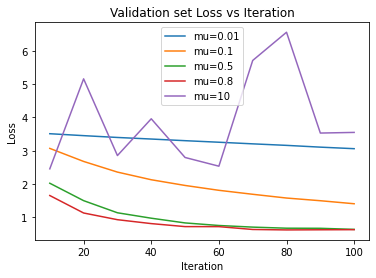

Zoom in for the mu that is too small:


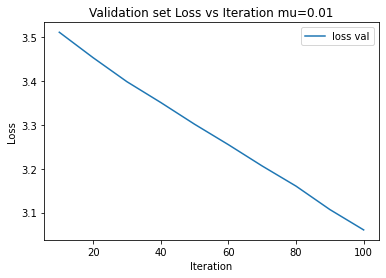

Zoom in for the mu that is too big:


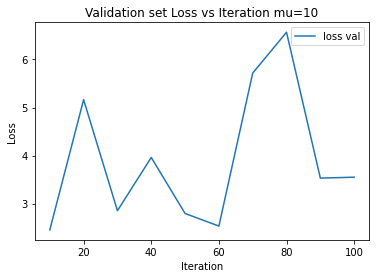

Zoom in for the mu that is stable:


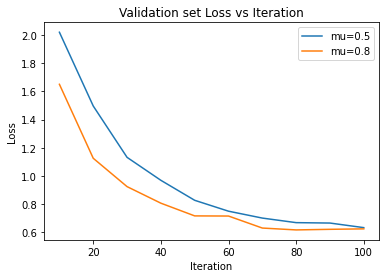

In [38]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here
mu_arr= [0.01, 0.1, 0.5, 0.8, 10]
max_iters = 100
costs = [] # all costs from each miu will be stored here
for mu in mu_arr:
  print(f"\n Those are the cost and accuracy results for mu = {mu}:")
  w, b, all_costs = run_gradient_descent(w0,b0, mu, max_iters=max_iters)
  costs += [all_costs]

# plot the results to analyze which mu is the stable  
x_axis = np.arange(10, max_iters + 10, 10)
for i in range(len(mu_arr)):
  plt.plot(x_axis, costs[i], "-", label=f"mu={mu_arr[i]}")
  plt.legend()
  plt.title(f"Validation set Loss vs Iteration")

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

print("Zoom in for the mu that is too small:")

plt.plot(x_axis, costs[0], "-", label="loss val")
plt.legend()
plt.title(f'Validation set Loss vs Iteration mu={mu_arr[0]}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

print("Zoom in for the mu that is too big:")

plt.plot(x_axis, costs[-1], "-", label="loss val")
plt.legend()
plt.title(f'Validation set Loss vs Iteration mu={mu_arr[-1]}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


print("Zoom in for the mu that is stable:")
for i in range(len(mu_arr)-3):
  plt.plot(x_axis, costs[i+2], "-", label=f"mu={mu_arr[i+2]}")
  plt.legend()
  plt.title(f"Validation set Loss vs Iteration")

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()



**Explain and discuss your results here:**


### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

Iter 10. [Val Acc 52%, Loss 2.584439]
Iter 20. [Val Acc 54%, Loss 1.982585]
Iter 30. [Val Acc 55%, Loss 1.709432]
Iter 40. [Val Acc 59%, Loss 1.392014]
Iter 50. [Val Acc 59%, Loss 1.352365]
Iter 60. [Val Acc 61%, Loss 1.152313]
Iter 70. [Val Acc 63%, Loss 1.121908]
Iter 80. [Val Acc 63%, Loss 0.959868]
Iter 90. [Val Acc 64%, Loss 0.950188]
Iter 100. [Val Acc 67%, Loss 0.857893]
Iter 10. [Val Acc 50%, Loss 2.386819]
Iter 20. [Val Acc 54%, Loss 1.865422]
Iter 30. [Val Acc 56%, Loss 1.505916]
Iter 40. [Val Acc 59%, Loss 1.277147]
Iter 50. [Val Acc 60%, Loss 1.103513]
Iter 60. [Val Acc 61%, Loss 0.983500]
Iter 70. [Val Acc 65%, Loss 0.855782]
Iter 80. [Val Acc 65%, Loss 0.809483]
Iter 90. [Val Acc 67%, Loss 0.755784]
Iter 100. [Val Acc 68%, Loss 0.719515]
Iter 10. [Val Acc 51%, Loss 2.318629]
Iter 20. [Val Acc 54%, Loss 1.832688]
Iter 30. [Val Acc 57%, Loss 1.447307]
Iter 40. [Val Acc 60%, Loss 1.189300]
Iter 50. [Val Acc 62%, Loss 1.004839]
Iter 60. [Val Acc 64%, Loss 0.900080]
Iter 70. [

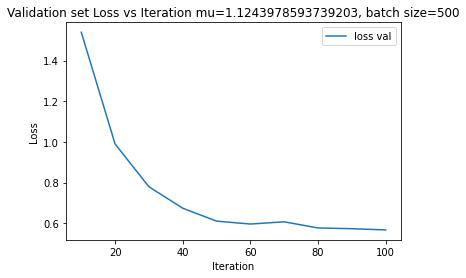

Iter 10. [Val Acc 57%, Loss 8.335660]
Iter 20. [Val Acc 57%, Loss 9.417825]
Iter 30. [Val Acc 66%, Loss 7.218841]
Iter 40. [Val Acc 64%, Loss 7.708940]
Iter 50. [Val Acc 66%, Loss 6.268437]
Iter 60. [Val Acc 63%, Loss 8.531792]
Iter 70. [Val Acc 61%, Loss 8.449505]
Iter 80. [Val Acc 64%, Loss 6.404596]
Iter 90. [Val Acc 65%, Loss 6.525806]
Iter 100. [Val Acc 64%, Loss 6.883527]
Bad behavior, for the optimal w and b for good mu and batch size:


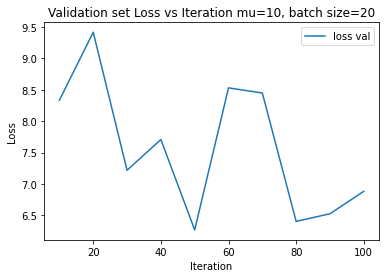

In [56]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# Write your code here

# find the best mu for gradient descent by minimizing cost function on last iteration
mu_arr = np.random.rand(5)+0.2
mu_arr.sort()
batch_arr = [20, 50, 100, 300, 500]
min_cost = 10000

for mu in mu_arr:
  for batch in batch_arr: 
    w, b, all_cost = run_gradient_descent(w0, b0, mu, batch_size=batch)
    if all_cost[-1] < min_cost:  # if we got better results, update the values to the optimal ones
      min_cost = all_cost[-1]
      mu_opt = mu
      batch_opt = batch


w_opt, b_opt, cost_arr = run_gradient_descent(w0, b0, mu_opt, batch_size=batch_opt)

print(f"The optimal w is: {w_opt} \n")
print(f"The optimal b is: {b_opt} \n")

print("Desired behavior, for the optimal w and b for good mu and batch size:")

plt.plot(x_axis, cost_arr, "-", label="loss val")
plt.legend()
plt.title(f'Validation set Loss vs Iteration mu={mu_opt}, batch size={batch_opt}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

w_opt_bad, b_opt_bad, cost_arr = run_gradient_descent(w0, b0, mu=10, batch_size=20)

print("Bad behavior, for the optimal w and b for good mu and batch size:")

plt.plot(x_axis, cost_arr, "-", label="loss val")
plt.legend()
plt.title(f'Validation set Loss vs Iteration mu=10, batch size=20')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


**Explain and discuss your results here:**




### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [54]:
# Write your code here

train_y = pred(w_opt,b_opt,train_norm_xs)
train_acc = get_accuracy(train_y,train_ts)
val_y = pred(w_opt,b_opt,val_norm_xs)
val_acc = get_accuracy(val_y,val_ts)
test_y = pred(w_opt,b_opt,test_norm_xs)
test_acc = get_accuracy(test_y,test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


# There is little difference between the values. It makes sense that the test set
# has the worst accuracy, for two reasons:
# 1) As we explained before, the values are computed with the train data so they do not
#    fit perfectly to the test data.
# 2) It is the smallest set.

train_acc =  0.7174818413642242  val_acc =  0.72074  test_acc =  0.7116792562463684


**Explain and discuss your results here:**


### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [55]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(train_norm_xs,train_ts)

train_acc = model.score(train_norm_xs,train_ts)
val_acc = model.score(val_norm_xs,val_ts)
test_acc = model.score(test_norm_xs,test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  0.7324124095089615  val_acc =  0.73612  test_acc =  0.7266899089676545


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
